In [71]:
# 데이터셋 준비, 데이터셋 확인(개요, 단항, 여러항), 여러가지 전처리(sex,slb+parch, embarkced, miss-master), 피쳐 설계, 기계학습 예측모델, 제출
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [139]:
train = pd.read_csv('./titanic/train.csv', index_col='PassengerId')
test = pd.read_csv('./titanic/test.csv', index_col='PassengerId')
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [140]:
test.tail()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [141]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [142]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [143]:
train.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [144]:
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [145]:
train.sample(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
290,1,3,"Connolly, Miss. Kate",female,22.0,0,0,370373,7.7500,NaN,Q
171,0,1,"Van der hoef, Mr. Wyckoff",male,61.0,0,0,111240,33.5000,B19,S
240,0,2,"Hunt, Mr. George Henry",male,33.0,0,0,SCO/W 1585,12.2750,NaN,S
869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
126,1,3,"Nicola-Yarred, Master. Elias",male,12.0,1,0,2651,11.2417,NaN,C


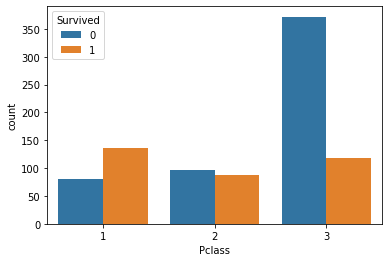

In [146]:
sns.countplot(data=train, x='Pclass', hue='Survived')

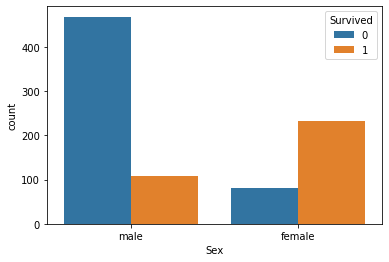

In [147]:
sns.countplot(data=train, x='Sex', hue='Survived')

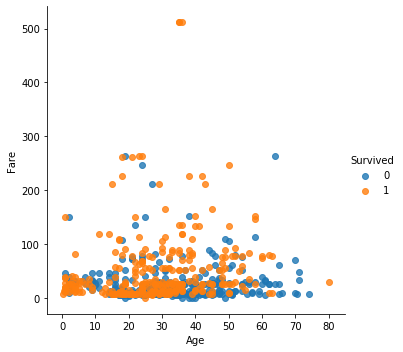

In [148]:
sns.lmplot(data=train, x='Age', y='Fare', hue='Survived', fit_reg=False)

In [149]:
train["Fare"]

PassengerId
1       7.2500
2      71.2833
3       7.9250
4      53.1000
5       8.0500
        ...   
887    13.0000
888    30.0000
889    23.4500
890    30.0000
891     7.7500
Name: Fare, Length: 891, dtype: float64

In [150]:
train["Fare"].loc[1:10]

PassengerId
1      7.2500
2     71.2833
3      7.9250
4     53.1000
5      8.0500
6      8.4583
7     51.8625
8     21.0750
9     11.1333
10    30.0708
Name: Fare, dtype: float64

In [151]:
high_fare =  train.loc[train['Fare'] > 50]

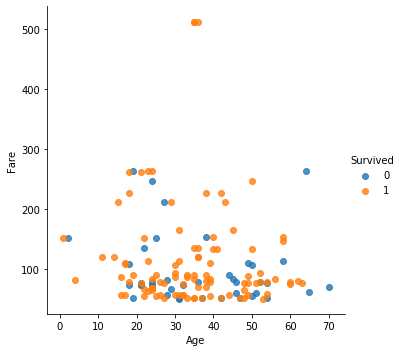

In [152]:
sns.lmplot(data=high_fare, x='Age', y='Fare', hue='Survived', fit_reg=False)

In [153]:
high_fare.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C


In [154]:
train['fare50'] = train.loc[train['Fare'] > 50, 'Fare']

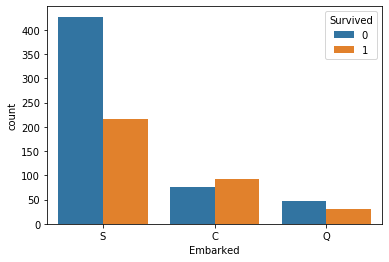

In [155]:
sns.countplot(data=train, x="Embarked", hue="Survived")

In [156]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,fare50
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,71.2833
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,53.1000
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN


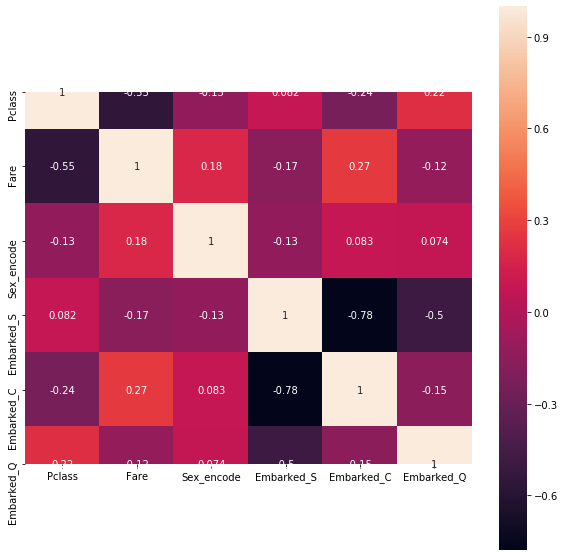

In [197]:
plt.figure(figsize=[10,10])
sns.heatmap(train[feature_names].corr(), annot=True, square=True)

In [157]:
train = train.drop(columns=['fare50'])
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [158]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [159]:
train.loc[train['Sex'] == 'male', 'Sex_encode'] = 0
train.loc[train['Sex'] == 'female', 'Sex_encode'] = 1

test.loc[test['Sex'] == 'male', 'Sex_encode'] = 0
test.loc[test['Sex'] == 'female', 'Sex_encode'] = 1

In [160]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encode
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1.0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1.0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.0


In [161]:
(train['SibSp'] + train['Parch']).tail(10)

PassengerId
882    0
883    0
884    0
885    0
886    5
887    0
888    0
889    3
890    0
891    0
dtype: int64

In [162]:
(train['SibSp']).tail(10)

PassengerId
882    0
883    0
884    0
885    0
886    0
887    0
888    0
889    1
890    0
891    0
Name: SibSp, dtype: int64

In [163]:
train['sib_parch'] = (train['SibSp'] + train['Parch'])
test['sib_parch'] = (test['SibSp'] + test['Parch'])
train.tail(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encode,sib_parch
PassengerId,,,,,,,,,,,,,
882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S,0.0,0
883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S,1.0,0
884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S,0.0,0
885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S,0.0,0
886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q,1.0,5
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0.0,0
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1.0,0
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1.0,3
890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0.0,0


In [164]:
train.loc[train['Embarked'] == 'S', 'Embarked_S'] = True
train.loc[train['Embarked'] != 'S', 'Embarked_S'] = False
train.loc[train['Embarked'] == 'C', 'Embarked_C'] = True
train.loc[train['Embarked'] != 'C', 'Embarked_C'] = False
train.loc[train['Embarked'] == 'Q', 'Embarked_Q'] = True
train.loc[train['Embarked'] != 'Q', 'Embarked_Q'] = False

test.loc[test['Embarked'] == 'S', 'Embarked_S'] = True
test.loc[test['Embarked'] != 'S', 'Embarked_S'] = False
test.loc[test['Embarked'] == 'C', 'Embarked_C'] = True
test.loc[test['Embarked'] != 'C', 'Embarked_C'] = False
test.loc[test['Embarked'] == 'Q', 'Embarked_Q'] = True
test.loc[test['Embarked'] != 'Q', 'Embarked_Q'] = False
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encode,sib_parch,Embarked_S,Embarked_C,Embarked_Q
PassengerId,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0,1,True,False,False
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1.0,1,False,True,False
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0,0,True,False,False
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1.0,1,True,False,False
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.0,0,True,False,False


In [165]:
train.sample(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encode,sib_parch,Embarked_S,Embarked_C,Embarked_Q
PassengerId,,,,,,,,,,,,,,,,
257,1,1,"Thorne, Mrs. Gertrude Maybelle",female,NaN,0,0,PC 17585,79.2000,NaN,C,1.0,0,False,True,False
482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0000,NaN,S,0.0,0,True,False,False
727,1,2,"Renouf, Mrs. Peter Henry (Lillian Jefferys)",female,30.0,3,0,31027,21.0000,NaN,S,1.0,3,True,False,False
831,1,3,"Yasbeck, Mrs. Antoni (Selini Alexander)",female,15.0,1,0,2659,14.4542,NaN,C,1.0,1,False,True,False
739,0,3,"Ivanoff, Mr. Kanio",male,NaN,0,0,349201,7.8958,NaN,S,0.0,0,True,False,False
750,0,3,"Connaghton, Mr. Michael",male,31.0,0,0,335097,7.7500,NaN,Q,0.0,0,False,False,True
760,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,110152,86.5000,B77,S,1.0,0,True,False,False
143,1,3,"Hakkarainen, Mrs. Pekka Pietari (Elin Matilda ...",female,24.0,1,0,STON/O2. 3101279,15.8500,NaN,S,1.0,1,True,False,False
784,0,3,"Johnston, Mr. Andrew G",male,NaN,1,2,W./C. 6607,23.4500,NaN,S,0.0,3,True,False,False


In [166]:
train['Name'].head(5)

PassengerId
1                              Braund, Mr. Owen Harris
2    Cumings, Mrs. John Bradley (Florence Briggs Th...
3                               Heikkinen, Miss. Laina
4         Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                             Allen, Mr. William Henry
Name: Name, dtype: object

In [167]:
# train['Name'].str.slice(start=???, stop=???)
# start[3] = train["Name"].str.index(", ") = [1,2,3,4,56,6,7,7]데이터프레임중 해당하는 데이터값
# stop = train["Name"].str.index(". ") 데이터프레임중 해당하는 데이터값
# train['Name'] -> for- only one row! -> for countValue=>[1,2,3,4,56,6,7,7] countValue
# countplot - > 처리 마무리
# 아래는 예제코드
# startNums = train["Name"].str.index(", ")
# train['Name'].str.slice(start=(train["Name"].str.index(", "))

In [168]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encode,sib_parch,Embarked_S,Embarked_C,Embarked_Q
PassengerId,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0,1,True,False,False
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1.0,1,False,True,False
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0,0,True,False,False
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1.0,1,True,False,False
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.0,0,True,False,False


In [169]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_encode,sib_parch
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.352413,0.904602
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.477990,1.613459
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000,0.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,10.000000


In [170]:
train.loc[train['Age'].isna(), 'Age'] = 30
test.loc[test['Age'].isna(), 'Age'] = 30
train.loc[train['Fare'].isna(), 'Fare'] = 32
test.loc[test['Fare'].isna(), 'Fare'] = 32

train.loc[train['Survived'] == 30]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encode,sib_parch,Embarked_S,Embarked_C,Embarked_Q
PassengerId,,,,,,,,,,,,,,,,


In [181]:
# X
feature_names = ['Pclass', 'Fare',  'Sex_encode', 'Embarked_S',
       'Embarked_C', 'Embarked_Q']
# Y
label_name = 'Survived'

X_train = train[feature_names]
X_test = test[feature_names]
Y_train = train[label_name]
X_test.shape

(418, 6)

In [182]:
Y_train.isna().sum()
Y_train.head()
Y_train.describe()
Y_train.shape

(891,)

In [186]:
# tree.DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=82, n_estimators=10000, n_jobs=-1, verbose=1)
model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10000,
                       n_jobs=-1, oob_score=False, random_state=82, verbose=1,
                       warm_start=False)

In [187]:
model.fit(X_train, Y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 6034 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 7184 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 8434 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 9784 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 10000 out of 

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10000,
                       n_jobs=-1, oob_score=False, random_state=82, verbose=1,
                       warm_start=False)

In [189]:
# graphviz 모듈을 가져옵니다.
import graphviz

# scikit-learn(줄여서 sklearn)의 tree 모듈에서 Decision Tree를 시각화 할 수 있는 export_graphviz를 가져옵니다.
from sklearn.tree import export_graphviz
dot_tree = export_graphviz(model,
                           feature_names=feature_names, out_file=None,class_names=["Perish", "Survived"])
graphviz.Source(dot_tree)

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [190]:
# fit이 끝났으면, predict라는 기능을 사용하여 생존 여부(Survived)를 예측합니다.
# predict의 실행이 끝나면 test 데이터의 생존 여부(Survived)를 반환하며, 이를 predictions라는 이름의 변수에 할당합니다.
predictions = model.predict(X_test)

# predictions 변수에 할당된 데이터의 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시되나, column이 없기 때문에 (row,) 형태로 표시될 것입니다.
print(predictions.shape)

# predictions 변수에 값이 너무 많기 때문에, 상위 10개만 출력합니다.
predictions[0:10]

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 1234 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 1784 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 2434 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 3184 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 4034 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 4984 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done 6034 tasks      | elapsed:    0.7s
[Parallel(n_jobs=8)]: Done 7184 tasks      | elapsed:    0.8s
[Parallel(n_jobs=8)]: Done 8434 tasks      | elapsed:    0.9s


(418,)


[Parallel(n_jobs=8)]: Done 9784 tasks      | elapsed:    1.1s
[Parallel(n_jobs=8)]: Done 10000 out of 10000 | elapsed:    1.1s finished


array([0, 1, 0, 0, 1, 0, 0, 1, 1, 0], dtype=int64)

In [191]:
submission = pd.read_csv('./titanic/gender_submission.csv', index_col='PassengerId')

In [192]:
submission.head()

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1


In [193]:
submission['Survived'] = predictions
submission.head()

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1


In [194]:
submission.to_csv('./titanic/test-case10-rForestClassifier.csv')